In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit=X[3]
some_image=some_digit.reshape(28,28)

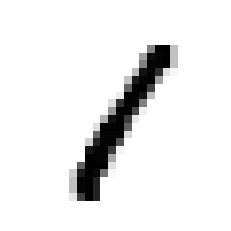

In [ ]:
plt.imshow(some_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
type(y[3])
import numpy as np

In [ ]:
y=y.astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
clone_clf = clone(sgd_clf)
X_train_folds = X_train[train_index]
y_train_folds = y_train_5[train_index]
X_test_fold = X_train[test_index]
y_test_fold = y_train_5[test_index]
clone_clf.fit(X_train_folds, y_train_folds)
y_pred = clone_clf.predict(X_test_fold)
n_correct = sum(y_pred == y_test_fold)
print(n_correct / len(y_pred))